In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
!pip install wordcloud


In [3]:
import nltk
from gensim.models import Word2Vec
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from keras import utils
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping


Using TensorFlow backend.


In [4]:
# KERAS
SEQUENCE_LENGTH =300
EPOCHS = 8
BATCH_SIZE = 1024

In [5]:
import re
from wordcloud import WordCloud, STOPWORDS 


DATASET_COLUMNS = ["target", "ids", "date", "flag", "user", "text"]
DATASET_ENCODING = "ISO-8859-1"

In [6]:
df1=pd.read_csv("/home/rishabh/NLP/hate speech/data.csv",encoding =DATASET_ENCODING , names=DATASET_COLUMNS)

In [58]:
df=df1[700000:900000]

In [59]:
df

,target,ids,date,flag,user,text
700000,0,2254623107,Sat Jun 20 10:02:00 PDT 2009,NO_QUERY,kingsean86,peopl tweet advic combat tear gas iran iranelect
700001,0,2254623203,Sat Jun 20 10:02:01 PDT 2009,NO_QUERY,joleendoreen,go 2 anberlin show 2nite ticket sold doc gave ...
700002,0,2254623331,Sat Jun 20 10:02:01 PDT 2009,NO_QUERY,kendel_rc,woke lot wisdom teeth drama gotta get thing re...
700003,0,2254623412,Sat Jun 20 10:02:02 PDT 2009,NO_QUERY,ctownson,yet dude gonna buy new one
700004,0,2254623626,Sat Jun 20 10:02:03 PDT 2009,NO_QUERY,skatinha,everytim fall asleep dream haunt
...,...,...,...,...,...,...
899995,4,1693956088,Mon May 04 00:27:13 PDT 2009,NO_QUERY,FelineBred,haha remark matern leav fire littl
899996,4,1693956096,Mon May 04 00:27:14 PDT 2009,NO_QUERY,softthistle,
899997,4,1693956099,Mon May 04 00:27:14 PDT 2009,NO_QUERY,elysion32,oki doke time escap north massa back turn get ...
899998,4,1693956134,Mon May 04 00:27:14 PDT 2009,NO_QUERY,fancyjessy,finish lesson hooray


In [60]:
df[df['target']==0]

,target,ids,date,flag,user,text
700000,0,2254623107,Sat Jun 20 10:02:00 PDT 2009,NO_QUERY,kingsean86,peopl tweet advic combat tear gas iran iranelect
700001,0,2254623203,Sat Jun 20 10:02:01 PDT 2009,NO_QUERY,joleendoreen,go 2 anberlin show 2nite ticket sold doc gave ...
700002,0,2254623331,Sat Jun 20 10:02:01 PDT 2009,NO_QUERY,kendel_rc,woke lot wisdom teeth drama gotta get thing re...
700003,0,2254623412,Sat Jun 20 10:02:02 PDT 2009,NO_QUERY,ctownson,yet dude gonna buy new one
700004,0,2254623626,Sat Jun 20 10:02:03 PDT 2009,NO_QUERY,skatinha,everytim fall asleep dream haunt
...,...,...,...,...,...,...
799995,0,2329205009,Thu Jun 25 10:28:28 PDT 2009,NO_QUERY,dandykim,sick spend day lay bed listen taylorswift13
799996,0,2329205038,Thu Jun 25 10:28:28 PDT 2009,NO_QUERY,bigenya,gmail
799997,0,2329205473,Thu Jun 25 10:28:30 PDT 2009,NO_QUERY,LeeLHoke,rest peac farrah sad
799998,0,2329205574,Thu Jun 25 10:28:30 PDT 2009,NO_QUERY,davidlmulder,sound like rival flag ad much though


In [61]:
df[df['target']==4]

,target,ids,date,flag,user,text
800000,4,1467822272,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,ersle,love health4uandpet u guy r best
800001,4,1467822273,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,becca210,im meet one besti tonight cant wait girl talk
800002,4,1467822283,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,Wingman29,thank twitter add sunisa got meet hin show dc ...
800003,4,1467822287,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,katarinka,sick realli cheap hurt much eat real food plus...
800004,4,1467822293,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,_EmilyYoung,effect everyon
...,...,...,...,...,...,...
899995,4,1693956088,Mon May 04 00:27:13 PDT 2009,NO_QUERY,FelineBred,haha remark matern leav fire littl
899996,4,1693956096,Mon May 04 00:27:14 PDT 2009,NO_QUERY,softthistle,
899997,4,1693956099,Mon May 04 00:27:14 PDT 2009,NO_QUERY,elysion32,oki doke time escap north massa back turn get ...
899998,4,1693956134,Mon May 04 00:27:14 PDT 2009,NO_QUERY,fancyjessy,finish lesson hooray


In [62]:
df.describe()

,target,ids
count,200000.000000,2.000000e+05
mean,2.000000,1.943938e+09
std,2.000005,3.480108e+08
min,0.000000,1.467822e+09
25%,0.000000,1.565295e+09
50%,2.000000,1.974290e+09
75%,4.000000,2.285370e+09
max,4.000000,2.329206e+09


In [63]:
decode_map = {0: "HATE", 4: "NOT HATE"}
def decode_sentiment(label):
    return decode_map[int(label)]

In [64]:
df.target = df.target.apply(lambda x: decode_sentiment(x))


In [65]:
df['target'].unique()

array(['HATE', 'NOT HATE'], dtype=object)

In [66]:
df.head(5)

,target,ids,date,flag,user,text
700000,HATE,2254623107,Sat Jun 20 10:02:00 PDT 2009,NO_QUERY,kingsean86,peopl tweet advic combat tear gas iran iranelect
700001,HATE,2254623203,Sat Jun 20 10:02:01 PDT 2009,NO_QUERY,joleendoreen,go 2 anberlin show 2nite ticket sold doc gave ...
700002,HATE,2254623331,Sat Jun 20 10:02:01 PDT 2009,NO_QUERY,kendel_rc,woke lot wisdom teeth drama gotta get thing re...
700003,HATE,2254623412,Sat Jun 20 10:02:02 PDT 2009,NO_QUERY,ctownson,yet dude gonna buy new one
700004,HATE,2254623626,Sat Jun 20 10:02:03 PDT 2009,NO_QUERY,skatinha,everytim fall asleep dream haunt


In [67]:
stop_words=stopwords.words("english")
stemmer = SnowballStemmer("english",ignore_stopwords=True)

In [68]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [69]:
#train_df= train_df.iloc[1900:2000,:]

TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

def preprocess(text,stem= True):
    # Remove link,user and special characters
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            tokens.append(stemmer.stem(token))
            

    return " ".join(tokens)

In [70]:
df.text = df.text.apply(lambda x: preprocess(x))


In [71]:
df.head(15)

,target,ids,date,flag,user,text
700000,HATE,2254623107,Sat Jun 20 10:02:00 PDT 2009,NO_QUERY,kingsean86,peopl tweet advic combat tear gas iran iranelect
700001,HATE,2254623203,Sat Jun 20 10:02:01 PDT 2009,NO_QUERY,joleendoreen,go 2 anberlin show 2nite ticket sold doc gave ...
700002,HATE,2254623331,Sat Jun 20 10:02:01 PDT 2009,NO_QUERY,kendel_rc,woke lot wisdom teeth drama gotta get thing re...
700003,HATE,2254623412,Sat Jun 20 10:02:02 PDT 2009,NO_QUERY,ctownson,yet dude gonna buy new one
700004,HATE,2254623626,Sat Jun 20 10:02:03 PDT 2009,NO_QUERY,skatinha,everytim fall asleep dream haunt
700005,HATE,2254623736,Sat Jun 20 10:02:04 PDT 2009,NO_QUERY,autumnconfusion,like stranger take away grandpar furnitur real...
700006,HATE,2254623828,Sat Jun 20 10:02:04 PDT 2009,NO_QUERY,drmalisa,hate get point pack dont know next also run bo...
700007,HATE,2254623889,Sat Jun 20 10:02:04 PDT 2009,NO_QUERY,Coolerthings,share anyon
700008,HATE,2254623966,Sat Jun 20 10:02:05 PDT 2009,NO_QUERY,shaunamariee,leav work camp 7 week aughhh
700009,HATE,2254624344,Sat Jun 20 10:02:07 PDT 2009,NO_QUERY,NadineGillies,saturday night broke


In [72]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
print("TRAIN size:", len(df_train))
print("TEST size:", len(df_test))

TRAIN size: 160000
TEST size: 40000


In [73]:
documents = [text.split() for text in df_train.text] 
documents

[['club',
  'slower',
  'usual',
  '2nite',
  'vibe',
  'incr',
  'real',
  'happi',
  'ubzz',
  'diver',
  'set',
  'threw',
  'dj'],
 ['watch', 'csi', 'miami', 'go', 'pub', 'quiz', 'reali', 'skint'],
 ['think', 'day', 'get', 'better'],
 ['awwwww', 'must', 'patienc', 'saint'],
 ['thas', 'good', 'think', 'might', 'go', 'fun'],
 ['ughh', 'sick'],
 ['work', '10', '7', 'staff', 'meet', 'ugh'],
 ['yesterday', '6', 'month', 'twitterversay'],
 ['2', '45am', 'almost', 'bedtim'],
 ['colgat', 'said', 'would', 'protect', 'caviti', 'lie'],
 ['unfollow',
  'protect',
  'twitter',
  'account',
  'demo',
  'twitter',
  'senior',
  'manag'],
 ['famili',
  'home',
  'alon',
  'grr',
  'hate',
  'h',
  'w',
  'good',
  'weather',
  'yesterday',
  'ok',
  'coz',
  'weather',
  'shitti',
  'sunni',
  'x'],
 ['talk', 'husband', 'japan', 'sushi', 'talk', 'chine', 'dinner', 'bummer'],
 ['guess',
  'bump',
  'firdaus',
  'azman',
  'today',
  'chat',
  'first',
  'time',
  'four',
  'silent',
  'year',
  'ni

In [74]:
model = Word2Vec(documents,size=300)
words = model.wv.vocab
words

{'club': <gensim.models.keyedvectors.Vocab at 0x7fb77a577950>,
 'slower': <gensim.models.keyedvectors.Vocab at 0x7fb7b7e58b50>,
 'usual': <gensim.models.keyedvectors.Vocab at 0x7fb70820d950>,
 '2nite': <gensim.models.keyedvectors.Vocab at 0x7fb70820da50>,
 'vibe': <gensim.models.keyedvectors.Vocab at 0x7fb70820d790>,
 'incr': <gensim.models.keyedvectors.Vocab at 0x7fb778226d10>,
 'real': <gensim.models.keyedvectors.Vocab at 0x7fb708211050>,
 'happi': <gensim.models.keyedvectors.Vocab at 0x7fb708211190>,
 'diver': <gensim.models.keyedvectors.Vocab at 0x7fb70820d810>,
 'set': <gensim.models.keyedvectors.Vocab at 0x7fb778226250>,
 'threw': <gensim.models.keyedvectors.Vocab at 0x7fb7082110d0>,
 'dj': <gensim.models.keyedvectors.Vocab at 0x7fb708211150>,
 'watch': <gensim.models.keyedvectors.Vocab at 0x7fb7082111d0>,
 'csi': <gensim.models.keyedvectors.Vocab at 0x7fb708211210>,
 'miami': <gensim.models.keyedvectors.Vocab at 0x7fb708211250>,
 'go': <gensim.models.keyedvectors.Vocab at 0x7fb7

In [75]:
model

In [76]:
print("vocabulary size")
len(words)

vocabulary size


11205

In [77]:
vector = model.wv['king']
vector.shape,vector

((300,),
 array([-4.05086279e-01, -5.93046509e-02, -1.19033724e-01,  7.90898129e-02,
        -1.59492642e-01,  6.10547103e-02,  7.97788575e-02,  4.85804006e-02,
        -5.24921902e-02,  1.74146146e-01, -3.28295911e-03,  4.41122102e-03,
         8.20600092e-02,  9.92689952e-02,  1.19606324e-01, -1.03350580e-01,
        -2.05490828e-01, -2.19812557e-01, -1.87014982e-01,  2.23259464e-01,
        -2.51636505e-01,  1.15842428e-02, -7.28861988e-02, -2.48535067e-01,
         2.63356380e-02,  1.06040351e-01,  1.31810000e-02, -9.21406448e-02,
        -2.33507063e-02, -3.18464749e-02,  8.22355598e-03, -1.20771162e-01,
        -2.06443686e-02, -1.70640633e-01,  4.65600714e-02,  2.22449586e-01,
         1.99816301e-01,  2.57540345e-01, -1.07405111e-02,  1.63078949e-01,
        -8.54343846e-02,  6.45780489e-02,  5.62484749e-02,  8.72575566e-02,
        -1.45030856e-01,  1.02788225e-01,  1.45716872e-02, -3.76681089e-02,
        -1.11682795e-01,  2.54138466e-03,  2.22749546e-01, -1.65768266e-01,
   

In [78]:
model.wv.most_similar('boy')


[('girl', 0.8526358008384705),
 ('babi', 0.7996469140052795),
 ('lil', 0.7086042165756226),
 ('boyfriend', 0.7047041654586792),
 ('sis', 0.6910151243209839),
 ('toooooo', 0.6842336654663086),
 ('kitti', 0.6816772818565369),
 ('rooftop', 0.6793476343154907),
 ('fight', 0.6700567007064819),
 ('crasher', 0.6660693287849426)]

# wordcloud


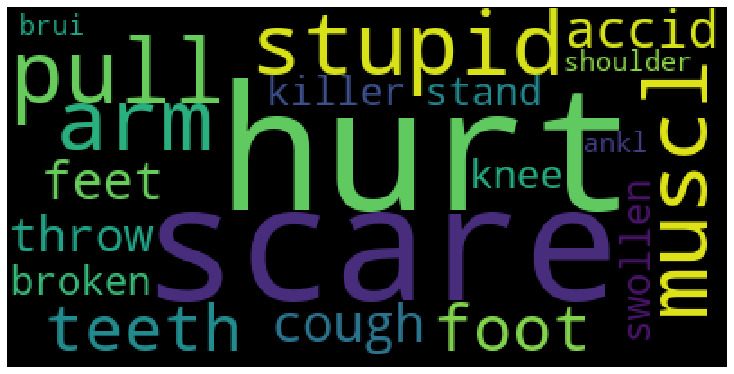

In [79]:
word="kill"


if word in words:
    str1=""
    for i in model.wv.most_similar(word,topn=20):
        str1+=" " + i[0]+ " "

    wordcloud = WordCloud().generate(str1) 
    plt.figure(figsize=(10,7)) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show() 

else:
    print("word not in vocabulary") 

In [80]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_train.text)

vocab_size = len(tokenizer.word_index) + 1
print("Total words", vocab_size)

Total words 61659


In [81]:
tokenizer.word_index

{'go': 1,
 'get': 2,
 'day': 3,
 'good': 4,
 'like': 5,
 'work': 6,
 'love': 7,
 'quot': 8,
 'today': 9,
 'time': 10,
 'miss': 11,
 'thank': 12,
 'got': 13,
 'one': 14,
 'want': 15,
 'lol': 16,
 'back': 17,
 'know': 18,
 'u': 19,
 'see': 20,
 'think': 21,
 'feel': 22,
 'realli': 23,
 'im': 24,
 'amp': 25,
 'hope': 26,
 'night': 27,
 'still': 28,
 'watch': 29,
 '2': 30,
 'need': 31,
 'well': 32,
 'make': 33,
 'new': 34,
 'home': 35,
 'look': 36,
 'twitter': 37,
 'come': 38,
 'oh': 39,
 'much': 40,
 'wish': 41,
 'morn': 42,
 'great': 43,
 'last': 44,
 'sad': 45,
 'sleep': 46,
 'tomorrow': 47,
 'wait': 48,
 'bad': 49,
 '3': 50,
 'haha': 51,
 'happi': 52,
 'follow': 53,
 'fun': 54,
 'tri': 55,
 'right': 56,
 'week': 57,
 'thing': 58,
 'would': 59,
 'friend': 60,
 'sorri': 61,
 'say': 62,
 'nice': 63,
 'tonight': 64,
 'take': 65,
 'way': 66,
 'better': 67,
 'could': 68,
 'gonna': 69,
 'though': 70,
 'peopl': 71,
 'bed': 72,
 'even': 73,
 'hate': 74,
 'tweet': 75,
 'yeah': 76,
 'show': 77,
 

In [82]:
x_train = pad_sequences(tokenizer.texts_to_sequences(df_train.text), maxlen=SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(df_test.text), maxlen=SEQUENCE_LENGTH)

In [83]:
x_test.shape

(40000, 300)

In [84]:
labels = df_train.target.unique().tolist()
labels

['NOT HATE', 'HATE']

In [85]:

encoder = LabelEncoder()
encoder.fit(df_train.target.tolist())

y_train = encoder.transform(df_train.target.tolist())
y_test = encoder.transform(df_test.target.tolist())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train",y_train.shape)
print("y_test",y_test.shape)



y_train (160000, 1)
y_test (40000, 1)


In [86]:
train_df

NameError: name 'train_df' is not defined

In [88]:
print("x_train", x_train.shape)
print("y_train", y_train.shape)
print()
print("x_test", x_test.shape)
print("y_test", y_test.shape)

x_train (160000, 300)
y_train (160000, 1)

x_test (40000, 300)
y_test (40000, 1)


In [87]:
embedding_matrix = np.zeros((vocab_size, 300))
for word, i in tokenizer.word_index.items():
    if word in words.keys():
        embedding_matrix[i] = tokenizer.word_index[word]
print(embedding_matrix.shape)

(61659, 300)


In [89]:
embedding_layer = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=SEQUENCE_LENGTH, trainable=False)


In [90]:
model = Sequential()
model.add(embedding_layer)
model.add(Dropout(0.5))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 300, 300)          18497700  
_________________________________________________________________
dropout_1 (Dropout)          (None, 300, 300)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 18,658,201
Trainable params: 160,501
Non-trainable params: 18,497,700
_________________________________________________________________


In [91]:
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])


In [92]:
callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
              EarlyStopping(monitor='val_acc', min_delta=1e-4, patience=5)]

In [93]:
history = model.fit(x_train, y_train,
                    batch_size=512,
                    epochs=4,
                    validation_split=0.1,
                    verbose=1,
                    callbacks=callbacks)

Epoch 1/4
282/282 [==============================] - 1520s 5s/step - loss: 0.7032 - accuracy: 0.5059 - val_loss: 0.6928 - val_accuracy: 0.5126 - lr: 0.0010
Epoch 2/4
282/282 [==============================] - 1724s 6s/step - loss: 0.6938 - accuracy: 0.5082 - val_loss: 0.6924 - val_accuracy: 0.5147 - lr: 0.0010
Epoch 3/4
282/282 [==============================] - 1708s 6s/step - loss: 0.6922 - accuracy: 0.5166 - val_loss: 0.6930 - val_accuracy: 0.5056 - lr: 0.0010
Epoch 4/4
282/282 [==============================] - 1402s 5s/step - loss: 0.6918 - accuracy: 0.5179 - val_loss: 0.6924 - val_accuracy: 0.5167 - lr: 0.0010


In [94]:
score = model.evaluate(x_test, y_test, batch_size=512)
print()
print("ACCURACY:",score[1])
print("LOSS:",score[0])

79/79 [==============================] - 108s 1s/step - loss: 0.6914 - accuracy: 0.5162

ACCURACY: 0.5162249803543091
LOSS: 0.6914367079734802


In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score

# Logistic Regression

log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
predict_log = log_reg.predict(x_test)
accuracy_score(y_test, predict_log)

/home/rishabh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/rishabh/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.508

In [101]:
x_test.shape,x_train.shape

((40000, 300), (160000, 300))

In [102]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier()
rand_clf.fit(x_train, y_train)
predict = rand_clf.predict(x_test)
accuracy_score(y_test, predict)

/home/rishabh/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/rishabh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.574225

In [104]:

from sklearn.ensemble import GradientBoostingClassifier
grad_clf = GradientBoostingClassifier()
grad_clf.fit(x_train, y_train)
predict_grad = grad_clf.predict(x_test)
accuracy_score(y_test, predict_grad)

/home/rishabh/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.590525